In [34]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
# load final clean dataset
df = pd.read_csv('merged_clean_data.csv')

In [36]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [37]:
year1998 = df[df['Date/Time'] <= '1998-12-31']

In [38]:
year1998[year1998['Construction'] <0]

,provincename,Longitude,Latitude,Region.Name,Date/Time,Utilities,Construction,Manufacturing,Transportation and warehousing,Educational services,...,Mean Min Temp (°C),Mean Temp (°C),Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)


In [39]:
year1998_ON = year1998[year1998['provincename'] == 'Ontario']

In [40]:
year1998_ON.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 20066 to 25768
Data columns (total 34 columns):
 #   Column                                                                             Non-Null Count  Dtype         
---  ------                                                                             --------------  -----         
 0   provincename                                                                       612 non-null    object        
 1   Longitude                                                                          612 non-null    float64       
 2   Latitude                                                                           612 non-null    float64       
 3   Region.Name                                                                        612 non-null    object        
 4   Date/Time                                                                          612 non-null    datetime64[ns]
 5   Utilities                                               

In [41]:
year1998_ON.head(14)

,provincename,Longitude,Latitude,Region.Name,Date/Time,Utilities,Construction,Manufacturing,Transportation and warehousing,Educational services,...,Mean Min Temp (°C),Mean Temp (°C),Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
20066,Ontario,-77.88,45.07,Faraday (TP),1998-01-01,2.157344,5.187631,3.886560,0.829180,1.328471,...,-13.2,-7.9,5.5,-31.5,0.0,0.0,123.0,0.0,0.0,0.0
20067,Ontario,-77.88,45.07,Faraday (TP),1998-02-01,2.336429,5.208899,3.874357,0.823220,1.315973,...,-12.2,-4.4,10.6,-27.4,0.0,0.0,0.0,0.0,0.0,0.0
20068,Ontario,-77.88,45.07,Faraday (TP),1998-03-01,2.308242,4.990105,3.927765,0.855761,1.307226,...,-8.9,-2.6,22.3,-24.4,0.0,0.0,0.0,0.0,0.0,0.0
20069,Ontario,-77.88,45.07,Faraday (TP),1998-04-01,2.503029,5.157777,3.974108,0.857215,1.388313,...,-3.6,4.9,23.0,-8.4,0.0,0.0,43.5,0.0,0.0,0.0
20070,Ontario,-77.88,45.07,Faraday (TP),1998-05-01,2.393748,4.786739,3.860343,0.848431,1.283968,...,5.3,13.8,29.9,-3.2,0.0,0.0,48.4,0.0,0.0,0.0
20071,Ontario,-77.88,45.07,Faraday (TP),1998-06-01,2.495035,4.803445,3.830808,0.825540,1.283912,...,8.6,15.4,30.1,-1.7,0.0,0.0,54.4,0.0,0.0,0.0
20072,Ontario,-77.88,45.07,Faraday (TP),1998-07-01,2.529841,4.850080,3.883859,0.843039,1.234983,...,10.1,17.8,33.2,4.2,0.0,0.0,92.0,0.0,0.0,0.0
20073,Ontario,-77.88,45.07,Faraday (TP),1998-08-01,2.583560,4.776135,3.798256,0.860795,1.316301,...,9.7,17.4,29.8,0.2,0.0,0.0,96.0,0.0,0.0,0.0
20074,Ontario,-77.88,45.07,Faraday (TP),1998-09-01,2.588554,4.830284,3.938677,0.825505,1.234077,...,5.8,13.5,27.9,-3.5,0.0,0.0,73.2,0.0,0.0,0.0
20075,Ontario,-77.88,45.07,Faraday (TP),1998-10-01,2.465875,4.858333,3.927499,0.859085,1.300379,...,0.7,7.4,21.4,-5.0,0.0,0.0,36.0,0.0,0.0,0.0


In [42]:
year1998_ON.set_index('Date/Time', inplace = True)

In [43]:
# split data into numeric and string
num_cols = year1998_ON.select_dtypes(include = ['number'])
cat_cols = year1998_ON.select_dtypes(include = ['object'])

# resample numeric data
resampled_num = num_cols.resample("M").mean()

# resample string data
resampled_cat = cat_cols.resample('M').apply(lambda x: x.value_counts().idxmax())

# combine resampled data
resampled_data_M = pd.concat([resampled_num, resampled_cat], axis = 1)
print(type(resampled_data_M))

# resampled_data = df.resample('M').mean()
# print(resampled_data)

<class 'pandas.core.frame.DataFrame'>


In [44]:
resampled_data_M

,Longitude,Latitude,Utilities,Construction,Manufacturing,Transportation and warehousing,Educational services,Health care and social assistance,Accommodation and food services,Other services except public administration,...,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),provincename,Region.Name,Station Name,Climate ID
Date/Time,,,,,,,,,,,,,,,,,,,,,
1998-01-31,-80.221765,44.755882,49.872721,186.461540,492.323029,132.983116,215.530038,243.307763,69.995639,67.154368,...,51.952941,32.298039,90.741176,12.921569,0.450980,1.098039,Ontario,Ottawa (CV),BANCROFT AUTO,616I001
1998-02-28,-80.221765,44.755882,54.012731,187.225972,490.777253,132.027216,213.502459,243.977925,70.694550,67.903732,...,25.582353,4.156863,31.288235,4.627451,0.607843,1.019608,Ontario,Ottawa (CV),BANCROFT AUTO,616I001
1998-03-31,-80.221765,44.755882,53.361117,179.361773,497.542544,137.246137,212.083291,244.251294,71.104676,68.585786,...,49.825490,25.756863,77.333333,0.843137,0.078431,1.156863,Ontario,Ottawa (CV),BANCROFT AUTO,616I001
1998-04-30,-80.221765,44.755882,57.864142,185.388467,503.412997,137.479360,225.238868,244.300598,71.696146,69.327501,...,39.958824,0.517647,42.747059,0.000000,0.411765,1.019608,Ontario,Ottawa (CV),BANCROFT AUTO,616I001
1998-05-31,-80.221765,44.755882,55.337812,172.052059,489.002038,136.070638,208.309946,245.109483,71.914804,69.673782,...,42.966667,0.031373,47.249020,0.000000,0.470588,1.352941,Ontario,Ottawa (CV),BANCROFT AUTO,616I001
1998-06-30,-80.221765,44.755882,57.679332,172.652538,485.260727,132.399352,208.300908,248.308149,73.624414,69.997785,...,76.384314,0.003922,83.607843,0.000000,0.549020,1.372549,Ontario,Ottawa (CV),BANCROFT AUTO,616I001
1998-07-31,-80.221765,44.755882,58.483973,174.328752,491.980888,135.205791,200.362674,248.673823,73.114767,72.276512,...,55.756863,0.000000,62.176471,0.000000,0.529412,1.156863,Ontario,Ottawa (CV),BANCROFT AUTO,616I001
1998-08-31,-80.221765,44.755882,59.725821,171.670917,481.137189,138.053569,213.555575,237.180979,74.536716,71.801409,...,63.986275,0.000000,71.194118,0.000000,0.470588,1.058824,Ontario,Ottawa (CV),BANCROFT AUTO,616I001
1998-09-30,-80.221765,44.755882,59.841275,173.617223,498.924851,132.393729,200.215677,242.192279,74.789648,71.790432,...,47.747059,0.000000,52.841176,0.000000,0.627451,1.568627,Ontario,Ottawa (CV),BANCROFT AUTO,616I001


<Axes: >

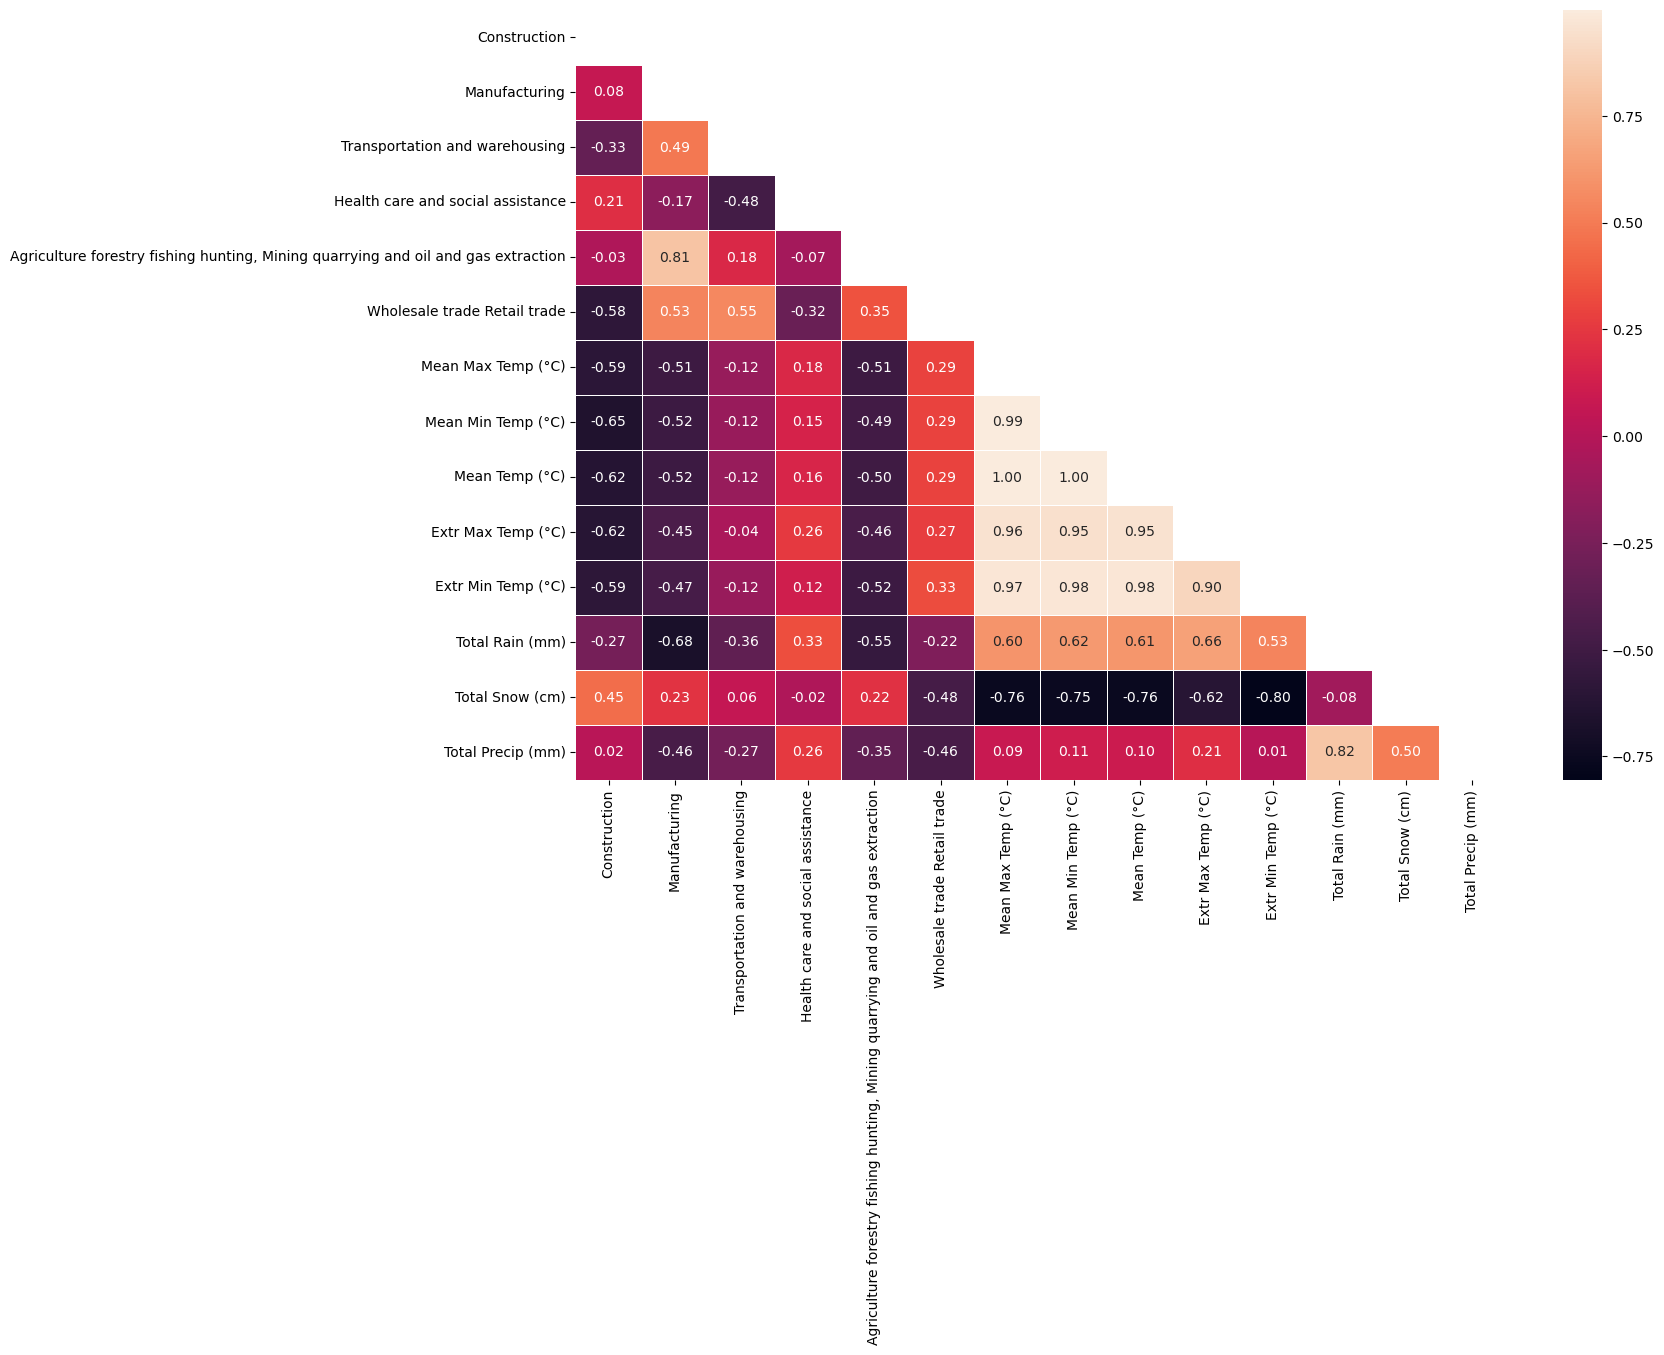

In [45]:
# CORRELATION MATRIX

# numeric columns
num_df = resampled_data_M.select_dtypes(include = ['number'])

# columns to exclude
to_drop = ['Longitude', 'Latitude', 'GeoUID', 'Population']
sectors_todrop = ['Utilities', 'Educational services', 'Accommodation and food services', 'Other services except public administration',
                  'Public administration', 'Finance and insurance, real estate and rental and leasing', 'Professional scientific and technical services',
                  'Information culture and recreation']
weather_data_todrop = ['Snow Grnd Last Day (cm)', 'Dir of Max Gust (10s deg)',
                       'Spd of Max Gust (km/h)']

num_df.drop(columns = to_drop, inplace = True)
num_df.drop(columns = sectors_todrop, inplace = True)
num_df.drop(columns = weather_data_todrop, inplace = True)

# correlation matrix
corr_matrix = num_df.corr()

# to remove the upper portion of the matrix; contains the same information
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# correlation matrix heatmap
plt.figure(figsize= (15, 10))
sns.heatmap(corr_matrix, mask = mask, annot = True, fmt = '.2f', linewidths= 0.5)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load your weather data into a DataFrame (assuming it's already loaded)
# Replace "df" with your DataFrame containing the weather data

df = df[df['Construction'].notnull()]

# Select features (predictors)
X = df[['Mean Max Temp (°C)', 'Mean Min Temp (°C)', 'Mean Temp (°C)', 'Extr Max Temp (°C)',
        'Extr Min Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)']]

# Target variable
y = df['Construction']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2):', r2)

# Print the coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coefficients)


Mean Squared Error (MSE): 111118.35512654753
Root Mean Squared Error (RMSE): 333.34419917938806
R-squared (R2): 0.0034200099338613787
             Variable  Coefficient
0  Mean Max Temp (°C)    -8.722884
1  Mean Min Temp (°C)    11.744638
2      Mean Temp (°C)    -0.784762
3  Extr Max Temp (°C)     2.868897
4  Extr Min Temp (°C)    -2.660753
5     Total Rain (mm)    -0.438387
6     Total Snow (cm)    -0.569105
7   Total Precip (mm)     0.217672


c:\Users\chust\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


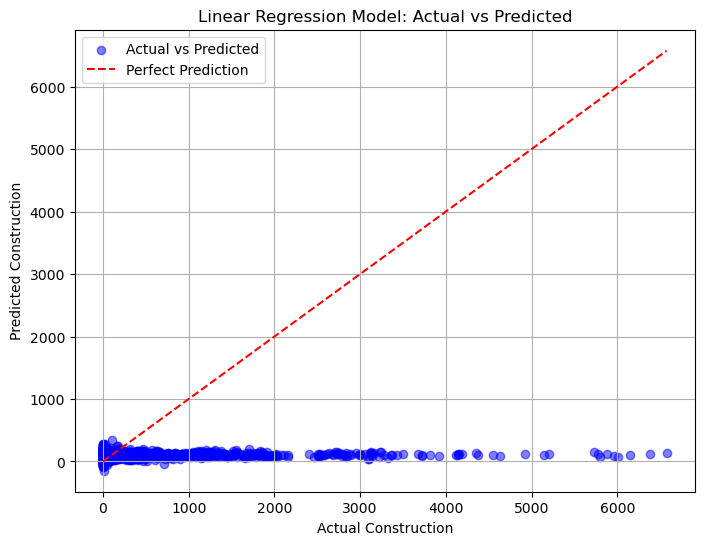

In [37]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs Predicted')  # Plot actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')  # Plot diagonal line
plt.title('Linear Regression Model: Actual vs Predicted')
plt.xlabel('Actual Construction')
plt.ylabel('Predicted Construction')
plt.grid(True)

# Add legend
plt.legend()

plt.show()
